# comparison to bayes from ds from scratch
This gives 101 true positives (spam classified as “spam”), 33 false positives (ham classified
as “spam”), 704 true negatives (ham classified as “ham”), and 38 false negatives
(spam classified as “ham”). This means our precision is 101 / (101 + 33) = 75%, and
our recall is 101 / (101 + 38) = 73%, which are not bad numbers for such a simple
model.

The spammiest words are “money,” “systemworks,” “rates,” “sale,” and “year,”

In [1]:
import theseus
import os
import sys
sys.path.append('/Users/niarfe/tmprepos/hydraseq')
import hydraseq as hd
! pip list | grep hydra

In [13]:
# ! mkdir data
# ! mv *.txt data/
! pwd
! cd data/; ls | xargs wc -l

/Users/niarfe/tmprepos/theseus_node
    3539 background.txt
    2747 easy_ham.txt
     283 hard_ham.txt
     509 spam.txt
    7078 total


In [3]:
def load_documents(path_file):
    documents = []
    with open(path_file, 'rb') as source:
        for line in source:
            try:
                documents.append(line.decode('utf-8').lower().strip().split()[1:])
            except:
                continue
    return documents

! ls data/
spam     = load_documents('data/spam.txt')
easy_ham = load_documents('data/easy_ham.txt')
hard_ham = load_documents('data/hard_ham.txt')
background = spam + easy_ham + hard_ham
print(len(spam), len(easy_ham), len(hard_ham), len(background))

background.txt easy_ham.txt   hard_ham.txt   spam.txt
498 2741 283 3522


In [4]:
n_background = theseus.Node(background)
n_spam       = theseus.Node(spam)
n_easy_ham   = theseus.Node(easy_ham)
n_hard_ham   = theseus.Node(hard_ham)
print('done')

done


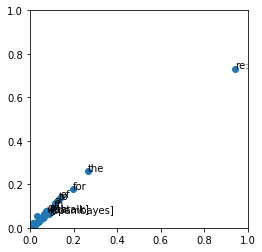

top spam:  ['adv:', 'rates', 'home', 'best', '[ilug-social]', 'systemworks', 'need', 'money', 'insurance', 'year']
top easy:  ['cvs', 'man', 'rh', 'viewing', "hanson's", 'sept', 'national', 'empire/g', 'sorting', 'o.t.']
top hard:  ['>', '[lockergnome', 'cnet', 'shopper)', '(cnet', 'tech', 'july', 'daily', 'reg', 'windows']
1	0	0	money
1	0	0	systemworks
1	0	0	rates
0	0	0	sale
1	0	0	year


In [5]:
theseus.node.visualize(n_easy_ham, n_background, axis_lims=(0.0, 1.0), magnification=10.0)

ratio = 0.1
f_spam = theseus.node.create_filter(n_spam, n_background, ratio=ratio)
f_easy = theseus.node.create_filter(n_easy_ham, n_background, ratio=ratio)
f_hard = theseus.node.create_filter(n_hard_ham, n_background, ratio=ratio)
# The spammiest words are “money,” “systemworks,” “rates,” “sale,” and “year,”
print("top spam: ", f_spam[:10])
print("top easy: ", f_easy[:10])
print("top hard: ", f_hard[:10])
for word in ['money', 'systemworks', 'rates', 'sale', 'year']:
    res = []
    for fil in [f_spam, f_easy, f_hard]:
        res.append("1" if word in fil else "0")
    res.append(word)
    print("\t".join(res))

In [6]:
print("starting")
cutoff =1
depth = 100
for target_filter, name in [(f_spam, "spam"), (f_hard, "hard"), (f_easy, "easy")]:
    print(name)
    sp, percsp = theseus.node.count_hits(spam,     target_filter, cutoff, depth)
    ha, percha = theseus.node.count_hits(hard_ham, target_filter, cutoff, depth)
    ea, percea = theseus.node.count_hits(easy_ham, target_filter, cutoff, depth)
    print(sp, percsp, ha, percha, ea, percea)
    print()


starting
spam
266 53.41 31 10.95 161 5.87

hard
55 11.04 199 70.32 158 5.76

easy
2 0.4 0 0.0 240 8.76



In [7]:
%%time
# Populate the main hydra with EEEEEEverything!
hdr = hd.Hydraseq('')
print("total sentences ", len(background))
#[hdr.full_insert(sentence) for sentence in background]
hdr.full_self_insert_from(background)
len(hdr.columns)

total sentences  3522


AttributeError: 'Hydraseq' object has no attribute 'columnsl'

In [8]:
idx_elem = 10
sentence = " ".join(background[idx_elem])
print(sentence)
print('---------------------------------------------------')

print(hdr.to_hydra_rep(sentence))

def group_to_hydra_rep(group):
    return [hdr.to_hydra_rep(sentence) for sentence in group]

h_background =  group_to_hydra_rep(background)
h_spam =        group_to_hydra_rep(spam)
h_easy_ham =    group_to_hydra_rep(easy_ham)
h_hard_ham =    group_to_hydra_rep(hard_ham)
print(h_spam)

^^^^^cell phone belt clips $1.95^^^^^^ 18070
---------------------------------------------------
incoming s:  ^^^^^cell phone belt clips $1.95^^^^^^ 18070
[]
incoming s:  ['life', 'insurance', '-', 'why', 'pay', 'more?']
incoming s:  ['[ilug]', 'guaranteed', 'to', 'lose', '10-12', 'lbs', 'in', '30', 'days', '10.206']
incoming s:  ['guaranteed', 'to', 'lose', '10-12', 'lbs', 'in', '30', 'days', '11.150']
incoming s:  ['re:', 'fw:', 'user', 'name', '&', 'password', 'to', 'membership', 'to', '5', 'sites', 'zzzz@example.com', 'pviqg']
incoming s:  ['[ilug-social]', 're:', 'guaranteed', 'to', 'lose', '10-12', 'lbs', 'in', '30', 'days', '10.148']
incoming s:  ['re:', 'your', 'bank', 'account', 'information']
incoming s:  ['fortune', '500', 'company', 'hiring,', 'at', 'home', 'reps.']
incoming s:  ['is', 'your', 'family', 'protected?']
incoming s:  ['re:', 'important', 'information', 'concerning', 'your', 'bank', 'account']
incoming s:  ['multiply', 'your', 'customer', 'base!']
incoming s:  [

incoming s:  ['death', 'of', 'the', 'monarch', 'of', 'the', 'kingdom', 'of', 'enenkio']
incoming s:  ['issuance', 'of', 'gold', 'stamps']
incoming s:  ['make', 'huge', 'profits', 'on', 'ebay', '951']
incoming s:  ['i', 'need', 'an', 'urgent', 'capable', 'assistance.tel:+225', '05775748']
incoming s:  ['the', '"business-owner', 'friendly"', 'pension', 'plan']
incoming s:  ['let', 'us', 'find', 'the', 'right', 'mortgage', 'lender', 'for', 'you', 'afpe']
incoming s:  ['wall', "street's", 'dirty', 'little', 'secret', '...']
incoming s:  ['re:', 'systemworks', 'clearance', 'sale_limited', 'quantities_only', '$29.99', 'tj']
incoming s:  ['=?big5?q?=a4=a3=ac=dd=b7|=ab=e1=ae=ac?=']
incoming s:  ['-->', 'direct', 'marketing', 'will', 'increase', 'sales', '23875']
incoming s:  ['what', 'warren', 'buffett', "won't", 'tell', 'ya', '...']
incoming s:  ['earn', '$139,000', 'a', 'year', 'as', 'a', 'day', 'trader!']
incoming s:  ['neu', 'im', 'handel!', 'k1-ausgabe', 'nr.66']
incoming s:  ['newsletter

incoming s:  ['whoa']
incoming s:  ['ouch...']
incoming s:  ['re:', 'gecko', 'adhesion', 'finally', 'sussed.']
incoming s:  ['re:', 'java', 'is', 'for', 'kiddies']
incoming s:  ['subject:', 're:', 'java', 'is', 'for', 'kiddies']
incoming s:  ['re:', 'ouch...']
incoming s:  ['re[2]:', 'java', 'is', 'for', 'kiddies']
incoming s:  ['adam', 'dont', 'job', 'for', 'no', 'one,', 'see.']
incoming s:  ['re:', 'cd', 'player', 'ui', 'for', 'toddlers']
incoming s:  ['re:', 'gecko', 'adhesion', 'finally', 'sussed.']
incoming s:  ['re:', 'cd', 'player', 'ui', 'for', 'toddlers']
incoming s:  ['re:', 'cd', 'player', 'ui', 'for', 'toddlers']
incoming s:  ['re:', 'cd', 'player', 'ui', 'for', 'toddlers']
incoming s:  ['re:', 'cd', 'player', 'ui', 'for', 'toddlers']
incoming s:  ['re:', 'adam', 'dont', 'job', 'for', 'no', 'one,', 'see.']
incoming s:  ['re:', 're[2]:', 'java', 'is', 'for', 'kiddies']
incoming s:  ['re:', 'cd', 'player', 'ui', 'for', 'toddlers']
incoming s:  ['re:', 'ouch...']
incoming s:  

incoming s:  ['re:', 'anolther', 'sequence', 'related', 'traceback']
incoming s:  ['re:', 'anolther', 'sequence', 'related', 'traceback']
incoming s:  ['re:', 'new', 'sequences', 'window']
incoming s:  ['re:', 'new', 'sequences', 'window']
incoming s:  ['re:', 'new', 'sequences', 'window']
incoming s:  ['re:', 'new', 'sequences', 'window']
incoming s:  ['re:', 'exmh', '&&', 'speed']
incoming s:  ['re:', 'new', 'sequences', 'window']
incoming s:  ['re:', 'new', 'sequences', 'window']
incoming s:  ['re:', 'new', 'sequences', 'window']
incoming s:  ['re:', 'new', 'sequences', 'window']
incoming s:  ['re:', 'new', 'sequences', 'window']
incoming s:  ['re:', 'arrrghhh', 'had', 'gpg', 'working,', 'now', 'it', 'doesnt.']
incoming s:  ['re:', 'arrrghhh', 'had', 'gpg', 'working,', 'now', 'it', 'doesnt.']
incoming s:  ['re:', 'arrrghhh', 'had', 'gpg', 'working,', 'now', 'it', 'doesnt.']
incoming s:  ['re:', 'arrrghhh', 'had', 'gpg', 'working,', 'now', 'it', 'doesnt.']
incoming s:  ['re:', 'arrrg

incoming s:  ['[spambayes]', 're:', '[python-dev]', 'getting', 'started', 'with', 'gbayes', 'testing']
incoming s:  ['[spambayes]', 'test', 'sets?']
incoming s:  ['[spambayes]', 'test', 'sets?']
incoming s:  ['[spambayes]', 'test', 'sets?']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'test', 'sets?']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'test', 'sets?']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'test', 'sets?']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spambayes]', 'corpus', 'collection', '(was:', 're:', 'deployment)']
incoming s:  ['[spambayes]', 'deployment']
incoming s:  ['[spamb

incoming s:  ['man', 'leads', 'machine', 'in', 'chess', 'duel']
incoming s:  ['human', 'handshake', 'opens', 'data', 'stream']
incoming s:  ['geneticists', 'and', 'a', 'tiny', 'worm', 'win', 'nobel', 'prize']
incoming s:  ['barney', 'not', 'found']
incoming s:  ['movable', 'type', '2.5', 'is', 'out']
incoming s:  ['trip', 'notes']
incoming s:  ['in', 'praise', 'of', 'evolvable', 'formats']
incoming s:  ['lego', 'harpsichord:', 'a', 'for', 'obsessiveness,', 'f', 'for', 'tunefulness']
incoming s:  ['$15,000', 'umbrella', 'stand:', 'nothing', 'exceeds', 'like', 'excess']
incoming s:  ['skinny', 'acoustic', 'bass']
incoming s:  ['bskyb', 'recruits', 'heavyweight', 'non-execs']
incoming s:  ['plans', 'for', 'new', 'youth', 'units', 'blocked']
incoming s:  ['paddick', 'backers', 'angry', 'at', 'met', 'move']
incoming s:  ['excellent', 'tim', 'biskup', 'card', 'deck']
incoming s:  ['mc', 'escher', 'in', 'lego']
incoming s:  ["doesn't", 'smell', 'like', 'team', 'spirit']
incoming s:  ['jjb', '

incoming s:  ['death', 'of', 'the', 'monarch', 'of', 'the', 'kingdom', 'of', 'enenkio']
incoming s:  ['issuance', 'of', 'gold', 'stamps']
incoming s:  ['make', 'huge', 'profits', 'on', 'ebay', '951']
incoming s:  ['i', 'need', 'an', 'urgent', 'capable', 'assistance.tel:+225', '05775748']
incoming s:  ['the', '"business-owner', 'friendly"', 'pension', 'plan']
incoming s:  ['let', 'us', 'find', 'the', 'right', 'mortgage', 'lender', 'for', 'you', 'afpe']
incoming s:  ['wall', "street's", 'dirty', 'little', 'secret', '...']
incoming s:  ['re:', 'systemworks', 'clearance', 'sale_limited', 'quantities_only', '$29.99', 'tj']
incoming s:  ['=?big5?q?=a4=a3=ac=dd=b7|=ab=e1=ae=ac?=']
incoming s:  ['-->', 'direct', 'marketing', 'will', 'increase', 'sales', '23875']
incoming s:  ['what', 'warren', 'buffett', "won't", 'tell', 'ya', '...']
incoming s:  ['earn', '$139,000', 'a', 'year', 'as', 'a', 'day', 'trader!']
incoming s:  ['neu', 'im', 'handel!', 'k1-ausgabe', 'nr.66']
incoming s:  ['newsletter

incoming s:  ['re:', 'cd', 'player', 'ui', 'for', 'toddlers']
incoming s:  ['re:', 'cd', 'player', 'ui', 'for', 'toddlers']
incoming s:  ['re:', 'adam', 'dont', 'job', 'for', 'no', 'one,', 'see.']
incoming s:  ['re:', 're[2]:', 'java', 'is', 'for', 'kiddies']
incoming s:  ['re:', 'cd', 'player', 'ui', 'for', 'toddlers']
incoming s:  ['re:', 'ouch...']
incoming s:  ['re:', 're[2]:', 'java', 'is', 'for', 'kiddies']
incoming s:  ['subject:', 're:', 're[2]:', 'java', 'is', 'for', 'kiddies']
incoming s:  ['re[2]:', 'selling', 'wedded', 'bliss', '(was', 're:', 'ouch...)']
incoming s:  ['re[2]:', 'selling', 'wedded', 'bliss', '(was', 're:', 'ouch...)']
incoming s:  ['efnet', '#fork']
incoming s:  ['re:', 'ouch...', '[bebergflame]']
incoming s:  ['re[2]:', 'selling', 'wedded', 'bliss', '(was', 're:', 'ouch...)']
incoming s:  ['re:', 'asynchronous', 'i/o', '(was', 're:', 'gasp!)']
incoming s:  ['re:', 'selling', 'wedded', 'bliss', '(was', 're:', 'ouch...)']
incoming s:  ['re[2]:', 'selling', 'w

incoming s:  ['traceback', 'in', 'new', 'exmh']
incoming s:  ['re:', 'linking', 'message', '[was:', 're:', 'patch', 'to', 'complete', 'a', 'change...]']
incoming s:  ['"requires:"', 'and', 'relational', 'operators']
incoming s:  ['re:', '"requires:"', 'and', 'relational', 'operators']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '(almost)', 'made', 'easy']
incoming s:  ['re:', 'alsa', '

incoming s:  ['re:', '[razor-users]', 'log', 'problem']
incoming s:  ['re:', '[razor-users]', 'log', 'problem']
incoming s:  ['[razor-users]', 'viewing', 'my', 'trust', 'rating?']
incoming s:  ['[razor-users]', 'bug?']
incoming s:  ['[razor-users]', 'how', 'to', 'test', 'razor']
incoming s:  ['[razor-users]', 'no', 'positive', 'razor', 'hits?']
incoming s:  ['12', '12:04:13.801513', 'check[52238]:', '[', '8]', 'mail', '1', 'subject:', 'home', 'based']
incoming s:  ['[razor-users]', 're:', 'collision', 'of', 'hashes?']
incoming s:  ['oh,', 'yeah']
incoming s:  ['[razor-users]', 'fun', 'uses', 'of', 'razored', 'mail']
incoming s:  ['[razor-users]', 'bug', '...', 'still']
incoming s:  ['[razor-users]', 'empty', 'mail', 'is', 'spamm?']
incoming s:  ['re:', '[razor-users]', 'empty', 'mail', 'is', 'spamm?']
incoming s:  ['re:', '[razor-users]', 'html', 'table', '-', 'razor', 'stats', 'using', '-lm', '4']
incoming s:  ['re:', '[razor-users]', 'early', 'experiences', 'with', 'razor2', '(and', 

incoming s:  ['the', 'semantic', 'web', 'makes', 'me', 'sick']
incoming s:  ['rip,', 'robert', 'l', 'forward']
incoming s:  ['google', 'pr', 'sends', 'a', 'message', 'that', 'they', 'have', 'a', 'new', 'news', 'service.']
incoming s:  ['san', 'francisco', 'caffeine', 'tour']
incoming s:  ['news.com:', 'google', 'search', 'gets', 'newsier.']
incoming s:  ['rss', 'revolt']
incoming s:  ['bruce', 'loebrich', 'has', 'scraped', 'rss', 'feeds', 'for', 'google', 'news,', 'and', 'a', 'rss']
incoming s:  ['rights', 'fight']
incoming s:  ['news.com:', '"linux', 'is', 'a', 'serious', 'competitor,"', 'said', 'ballmer.']
incoming s:  ['stark', 'raving', 'sane']
incoming s:  ['google', 'news']
incoming s:  ['light', 'reading']
incoming s:  ['sam', 'ruby:', '"yup,', "i'm", 'a', 'sick', 'puppy."', '_me', 'too!_']
incoming s:  ['note', 'to', 'self:', 'read', 'the', 'pingback', 'spec.', 'form', 'opinion.']
incoming s:  ['aaron', 'swartz:', '"if', 'everyone', 'is', 'afraid', 'to', 'speak,', 'who', 'will'

incoming s:  ['a&l', 'daily', 'to', 'be', 'auctioned', 'in', 'bankruptcy']
incoming s:  ['delphi', 'questions,', 'a', 'new', '_joel', 'on', 'software_', 'discussion', 'group.']
incoming s:  ["'i'm", 'just', 'an', "idiot'"]
incoming s:  ['city', 'planning', 'funnies']
incoming s:  ['support', 'for', 'iraq', 'action', 'at', 'new', 'low', 'of', '32%']
incoming s:  ['seeing', 'is', 'believing']
incoming s:  ['a', 'watched', 'server', 'never', 'breaks']
incoming s:  ["'nasty", "party'", 'warning', 'to', 'tories']
incoming s:  ['species', 'at', 'risk', 'of', 'extinction', 'growing']
incoming s:  ['indie', 'artist', 'hits', 'top-ten', 'by', 'engaging', 'audience']
incoming s:  ['teach', 'a', 'man', 'to', 'fish']
incoming s:  ['iran', 'pushes', 'un', 'intervention', 'against', 'us']
incoming s:  ['at', 'last,', 'i', 'have', 'an', 'excuse']
incoming s:  ['man', 'kills', 'self', 'with', 'home', 'booby-traps']
incoming s:  ['curried', 'radiation', 'burns']
incoming s:  ['1987', 'copy', 'of', 'nin

In [9]:
n_h_background = theseus.Node(h_background)
n_h_spam = theseus.Node(h_spam)
n_h_easy_ham = theseus.Node(h_easy_ham)
n_h_hard_ham = theseus.Node(h_hard_ham)

In [10]:
cutoff = 1
depth = 100
target = f_spam
theseus.node.count_hits(spam,     target, cutoff, depth)
theseus.node.count_hits(hard_ham, target, cutoff, depth)
theseus.node.count_hits(easy_ham, target, cutoff, depth);

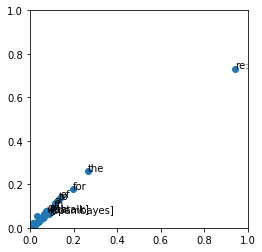

In [11]:
theseus.node.visualize(n_easy_ham, n_background, axis_lims=(0.0, 1.0), magnification=10.0)

In [12]:

def get_spiral_dots(node1, node2, ratio):
    x, y, keys = theseus.node.create_xy_table(node1, node2, cutoff1=100, cutoff2=100, ratio=ratio)
    #print(len(x), len(y), len(keys))
    cles = []
    for row in zip(keys, zip(x, y)):
        if row[1][1] != 0:
            #print(row)
            cles.append(row[0])
        else:
            cles.append(row[0])
            #print("bad row ", row)
    return cles

ratio = 0.9
spam_list = get_spiral_dots(n_h_spam,     n_h_background, ratio)
easy_list = get_spiral_dots(n_h_easy_ham, n_h_background, ratio)
hard_list = get_spiral_dots(n_h_hard_ham, n_h_background, ratio)

def new_count_hits(group, lst, thold):
    """group list<list<str>> lst list, thold int"""
    hits = 0
    for sentence in group:
        score = len(set(sentence) & set(lst))
        if score > thold:
            hits += 1
    return hits

print("background", len(h_background))
print("totals ", len(h_spam), len(h_easy_ham), len(h_hard_ham))
thold = 4
target = spam_list
spamers  = new_count_hits(h_spam,     target, thold)
easyhams = new_count_hits(h_easy_ham, target, thold)
hardhams = new_count_hits(h_hard_ham, target, thold)
print("hits   ",spamers, easyhams, hardhams)

background 3522
totals  498 2741 283
hits    0 0 0
